In [46]:
#importing packages to use in the project
import pandas as pd
import numpy as np
import seaborn as sns
import datetime 

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure


%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

#Importing the excel file
df = pd.read_csv(r'C:\Tasks\Work\Data Analysis\Case study\Bellabeat\Fitabase Data 4.12.16-5.12.16\dailyActivity_merged.csv')

#reading the data
df.head()





,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863


In [47]:
#checking for null values
for col in df.columns:
    null_values=np.mean(df[col].isnull())
    print(col,' - ',null_values)

Id  -  0.0
ActivityDate  -  0.0
TotalSteps  -  0.0
TotalDistance  -  0.0
TrackerDistance  -  0.0
LoggedActivitiesDistance  -  0.0
VeryActiveDistance  -  0.0
ModeratelyActiveDistance  -  0.0
LightActiveDistance  -  0.0
SedentaryActiveDistance  -  0.0
VeryActiveMinutes  -  0.0
FairlyActiveMinutes  -  0.0
LightlyActiveMinutes  -  0.0
SedentaryMinutes  -  0.0
Calories  -  0.0


In [48]:
df.dtypes

Id                            int64
ActivityDate                 object
TotalSteps                    int64
TotalDistance               float64
TrackerDistance             float64
LoggedActivitiesDistance    float64
VeryActiveDistance          float64
ModeratelyActiveDistance    float64
LightActiveDistance         float64
SedentaryActiveDistance     float64
VeryActiveMinutes             int64
FairlyActiveMinutes           int64
LightlyActiveMinutes          int64
SedentaryMinutes              int64
Calories                      int64
dtype: object

In [49]:
#dropping duplicates
df.drop_duplicates()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.500000,8.500000,0.0,1.88,0.55,6.06,0.00,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.970000,6.970000,0.0,1.57,0.69,4.71,0.00,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.740000,6.740000,0.0,2.44,0.40,3.91,0.00,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.280000,6.280000,0.0,2.14,1.26,2.83,0.00,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.160000,8.160000,0.0,2.71,0.41,5.04,0.00,36,10,221,773,1863
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
935,8877689391,5/8/2016,10686,8.110000,8.110000,0.0,1.08,0.20,6.80,0.00,17,4,245,1174,2847
936,8877689391,5/9/2016,20226,18.250000,18.250000,0.0,11.10,0.80,6.24,0.05,73,19,217,1131,3710
937,8877689391,5/10/2016,10733,8.150000,8.150000,0.0,1.35,0.46,6.28,0.00,18,11,224,1187,2832
938,8877689391,5/11/2016,21420,19.559999,19.559999,0.0,13.22,0.41,5.89,0.00,88,12,213,1127,3832


In [50]:
#Converting the column names into lower case
df= df.rename(columns=str.lower)
df.head()

,id,activitydate,totalsteps,totaldistance,trackerdistance,loggedactivitiesdistance,veryactivedistance,moderatelyactivedistance,lightactivedistance,sedentaryactivedistance,veryactiveminutes,fairlyactiveminutes,lightlyactiveminutes,sedentaryminutes,calories
0,1503960366,4/12/2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863


In [148]:
#Adding new column 'totalminutes' without sedentary minutes
df['totalactiveminutes']=df['veryactiveminutes']+df['fairlyactiveminutes']+df['lightlyactiveminutes']
df

,id,activitydate,totalsteps,totaldistance,trackerdistance,loggedactivitiesdistance,veryactivedistance,moderatelyactivedistance,lightactivedistance,sedentaryactivedistance,veryactiveminutes,fairlyactiveminutes,lightlyactiveminutes,sedentaryminutes,calories,totalminutes,day_of_week,totalactiveminutes
0,1503960366,2016-04-12,13162,8.49,8.500000,0.0,1.88,0.55,6.06,0.00,25,13,328,728,1985,366,Tuesday,366
1,1503960366,2016-04-13,10735,6.97,6.970000,0.0,1.57,0.69,4.71,0.00,21,19,217,776,1797,257,Wednesday,257
2,1503960366,2016-04-14,10460,6.75,6.740000,0.0,2.44,0.40,3.91,0.00,30,11,181,1218,1776,222,Thursday,222
3,1503960366,2016-04-15,9762,6.23,6.280000,0.0,2.14,1.26,2.83,0.00,29,34,209,726,1745,272,Friday,272
4,1503960366,2016-04-16,12669,8.16,8.160000,0.0,2.71,0.41,5.04,0.00,36,10,221,773,1863,267,Saturday,267
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
935,8877689391,2016-05-08,10686,8.08,8.110000,0.0,1.08,0.20,6.80,0.00,17,4,245,1174,2847,266,Sunday,266
936,8877689391,2016-05-09,20226,18.19,18.250000,0.0,11.10,0.80,6.24,0.05,73,19,217,1131,3710,309,Monday,309
937,8877689391,2016-05-10,10733,8.09,8.150000,0.0,1.35,0.46,6.28,0.00,18,11,224,1187,2832,253,Tuesday,253
938,8877689391,2016-05-11,21420,19.52,19.559999,0.0,13.22,0.41,5.89,0.00,88,12,213,1127,3832,313,Wednesday,313


In [140]:
#Adding new column 'totaldistance' 
df['totaldistance']=df['veryactivedistance']+df['moderatelyactivedistance']+df['lightactivedistance']+df['sedentaryactivedistance']
df.head()

,id,activitydate,totalsteps,totaldistance,trackerdistance,loggedactivitiesdistance,veryactivedistance,moderatelyactivedistance,lightactivedistance,sedentaryactivedistance,veryactiveminutes,fairlyactiveminutes,lightlyactiveminutes,sedentaryminutes,calories,totalminutes,day_of_week
0,1503960366,2016-04-12,13162,8.49,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,1094,Tuesday
1,1503960366,2016-04-13,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797,1033,Wednesday
2,1503960366,2016-04-14,10460,6.75,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776,1440,Thursday
3,1503960366,2016-04-15,9762,6.23,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745,998,Friday
4,1503960366,2016-04-16,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863,1040,Saturday


In [52]:
#converting 'activitydate' into datetime(YYYY-MM-DD) format
df['activitydate'] = pd.to_datetime(df['activitydate'])
df.head()
df

,id,activitydate,totalsteps,totaldistance,trackerdistance,loggedactivitiesdistance,veryactivedistance,moderatelyactivedistance,lightactivedistance,sedentaryactivedistance,veryactiveminutes,fairlyactiveminutes,lightlyactiveminutes,sedentaryminutes,calories,totalminutes
0,1503960366,2016-04-12,13162,8.500000,8.500000,0.0,1.88,0.55,6.06,0.00,25,13,328,728,1985,1094
1,1503960366,2016-04-13,10735,6.970000,6.970000,0.0,1.57,0.69,4.71,0.00,21,19,217,776,1797,1033
2,1503960366,2016-04-14,10460,6.740000,6.740000,0.0,2.44,0.40,3.91,0.00,30,11,181,1218,1776,1440
3,1503960366,2016-04-15,9762,6.280000,6.280000,0.0,2.14,1.26,2.83,0.00,29,34,209,726,1745,998
4,1503960366,2016-04-16,12669,8.160000,8.160000,0.0,2.71,0.41,5.04,0.00,36,10,221,773,1863,1040
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
935,8877689391,2016-05-08,10686,8.110000,8.110000,0.0,1.08,0.20,6.80,0.00,17,4,245,1174,2847,1440
936,8877689391,2016-05-09,20226,18.250000,18.250000,0.0,11.10,0.80,6.24,0.05,73,19,217,1131,3710,1440
937,8877689391,2016-05-10,10733,8.150000,8.150000,0.0,1.35,0.46,6.28,0.00,18,11,224,1187,2832,1440
938,8877689391,2016-05-11,21420,19.559999,19.559999,0.0,13.22,0.41,5.89,0.00,88,12,213,1127,3832,1440


In [53]:
#Finding the day of week from 'activitydate'
import datetime
df['day_of_week'] = pd.DatetimeIndex(df['activitydate']).day_name()
df

,id,activitydate,totalsteps,totaldistance,trackerdistance,loggedactivitiesdistance,veryactivedistance,moderatelyactivedistance,lightactivedistance,sedentaryactivedistance,veryactiveminutes,fairlyactiveminutes,lightlyactiveminutes,sedentaryminutes,calories,totalminutes,day_of_week
0,1503960366,2016-04-12,13162,8.500000,8.500000,0.0,1.88,0.55,6.06,0.00,25,13,328,728,1985,1094,Tuesday
1,1503960366,2016-04-13,10735,6.970000,6.970000,0.0,1.57,0.69,4.71,0.00,21,19,217,776,1797,1033,Wednesday
2,1503960366,2016-04-14,10460,6.740000,6.740000,0.0,2.44,0.40,3.91,0.00,30,11,181,1218,1776,1440,Thursday
3,1503960366,2016-04-15,9762,6.280000,6.280000,0.0,2.14,1.26,2.83,0.00,29,34,209,726,1745,998,Friday
4,1503960366,2016-04-16,12669,8.160000,8.160000,0.0,2.71,0.41,5.04,0.00,36,10,221,773,1863,1040,Saturday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
935,8877689391,2016-05-08,10686,8.110000,8.110000,0.0,1.08,0.20,6.80,0.00,17,4,245,1174,2847,1440,Sunday
936,8877689391,2016-05-09,20226,18.250000,18.250000,0.0,11.10,0.80,6.24,0.05,73,19,217,1131,3710,1440,Monday
937,8877689391,2016-05-10,10733,8.150000,8.150000,0.0,1.35,0.46,6.28,0.00,18,11,224,1187,2832,1440,Tuesday
938,8877689391,2016-05-11,21420,19.559999,19.559999,0.0,13.22,0.41,5.89,0.00,88,12,213,1127,3832,1440,Wednesday


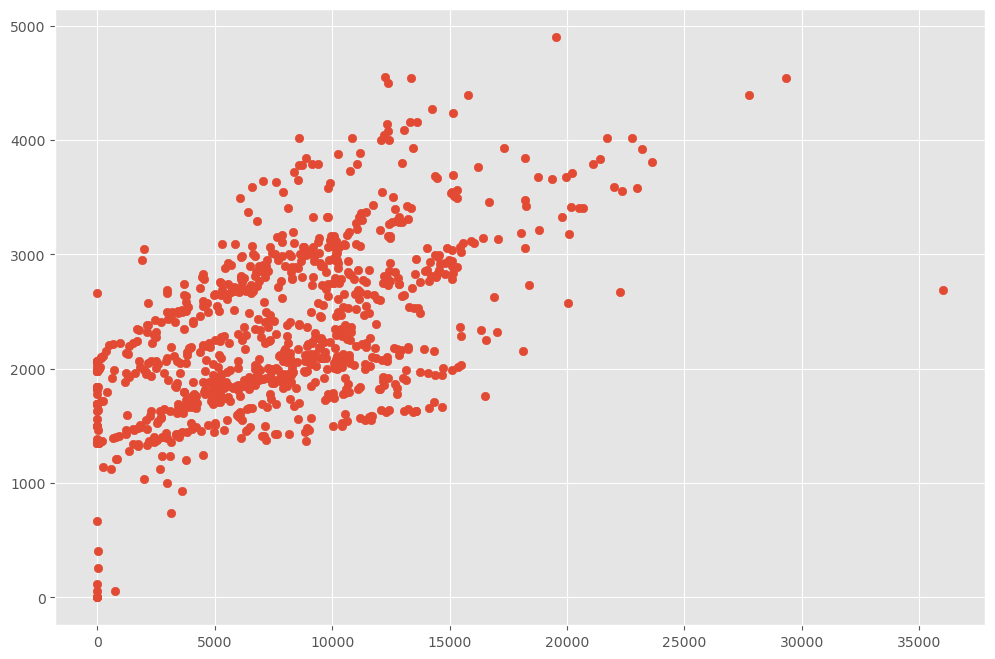

In [54]:
#Correlation between totalsteps and calories
#Scatter plot 

plt.scatter(x=df['totalsteps'],y=df['calories'])
plt.show()

In [55]:
df.corr()

,id,totalsteps,totaldistance,trackerdistance,loggedactivitiesdistance,veryactivedistance,moderatelyactivedistance,lightactivedistance,sedentaryactivedistance,veryactiveminutes,fairlyactiveminutes,lightlyactiveminutes,sedentaryminutes,calories,totalminutes
id,1.000000,0.185721,0.241000,0.238816,0.188015,0.308691,0.026665,0.019629,-0.015698,0.303608,0.051158,-0.098754,-0.043319,0.396671,-0.048274
totalsteps,0.185721,1.000000,0.985369,0.984822,0.181849,0.740115,0.507105,0.692208,0.070505,0.667079,0.498693,0.569600,-0.327484,0.591568,-0.017285
totaldistance,0.241000,0.985369,1.000000,0.999505,0.188332,0.794582,0.470758,0.662002,0.082389,0.681297,0.462899,0.516300,-0.288094,0.644962,0.004523
trackerdistance,0.238816,0.984822,0.999505,1.000000,0.162585,0.794338,0.470277,0.661365,0.074591,0.680816,0.463154,0.514713,-0.289343,0.645313,0.002416
loggedactivitiesdistance,0.188015,0.181849,0.188332,0.162585,1.000000,0.150852,0.076527,0.138302,0.154996,0.234443,0.053860,0.102135,-0.046999,0.207595,0.021689
veryactivedistance,0.308691,0.740115,0.794582,0.794338,0.150852,1.000000,0.192986,0.157669,0.046117,0.826681,0.211730,0.059845,-0.061754,0.491959,0.072625
moderatelyactivedistance,0.026665,0.507105,0.470758,0.470277,0.076527,0.192986,1.000000,0.237847,0.005793,0.225464,0.946934,0.162092,-0.221436,0.216790,-0.085297
lightactivedistance,0.019629,0.692208,0.662002,0.661365,0.138302,0.157669,0.237847,1.000000,0.099503,0.154966,0.220129,0.885697,-0.413552,0.466917,-0.069207
sedentaryactivedistance,-0.015698,0.070505,0.082389,0.074591,0.154996,0.046117,0.005793,0.099503,1.000000,0.008258,-0.022361,0.124185,0.035475,0.043652,0.090510
veryactiveminutes,0.303608,0.667079,0.681297,0.680816,0.234443,0.826681,0.225464,0.154966,0.008258,1.000000,0.312420,0.051926,-0.164671,0.615838,-0.018244


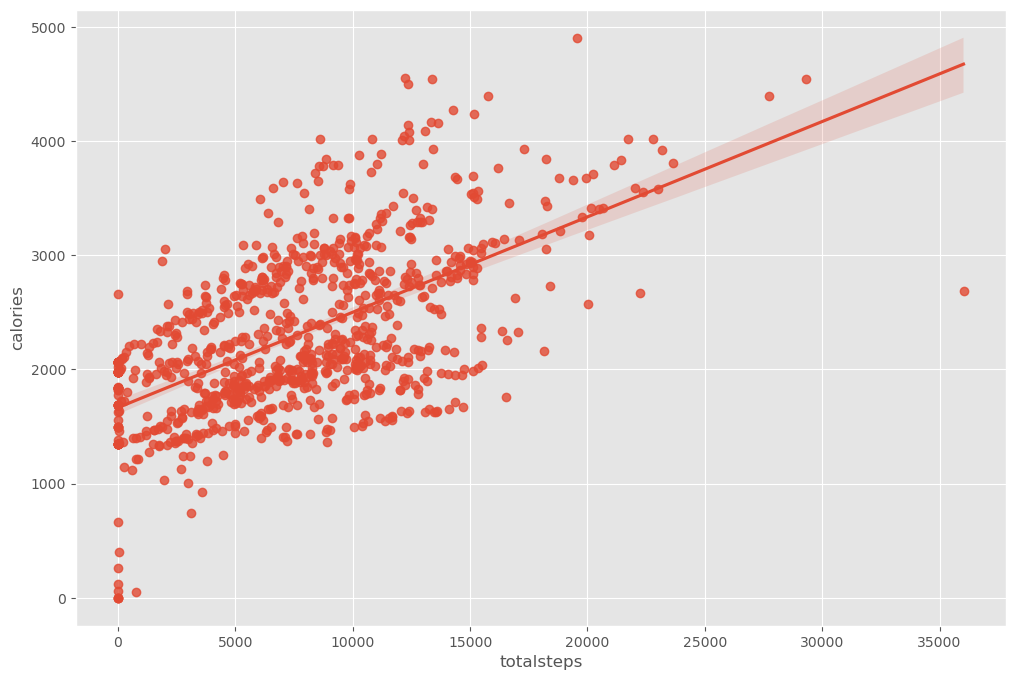

In [56]:
sns.regplot(x='totalsteps',y='calories',data=df,)
plt.show()

<AxesSubplot:xlabel='totalsteps', ylabel='totaldistance'>

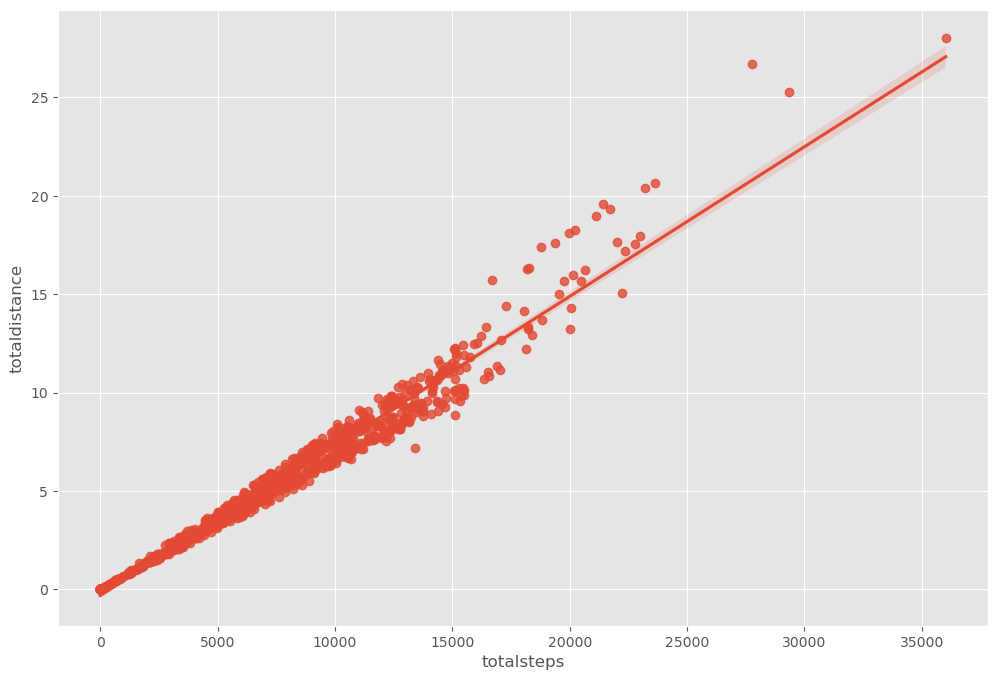

In [57]:
sns.regplot(x='totalsteps',y='totaldistance',data=df)

<AxesSubplot:xlabel='totaldistance', ylabel='calories'>

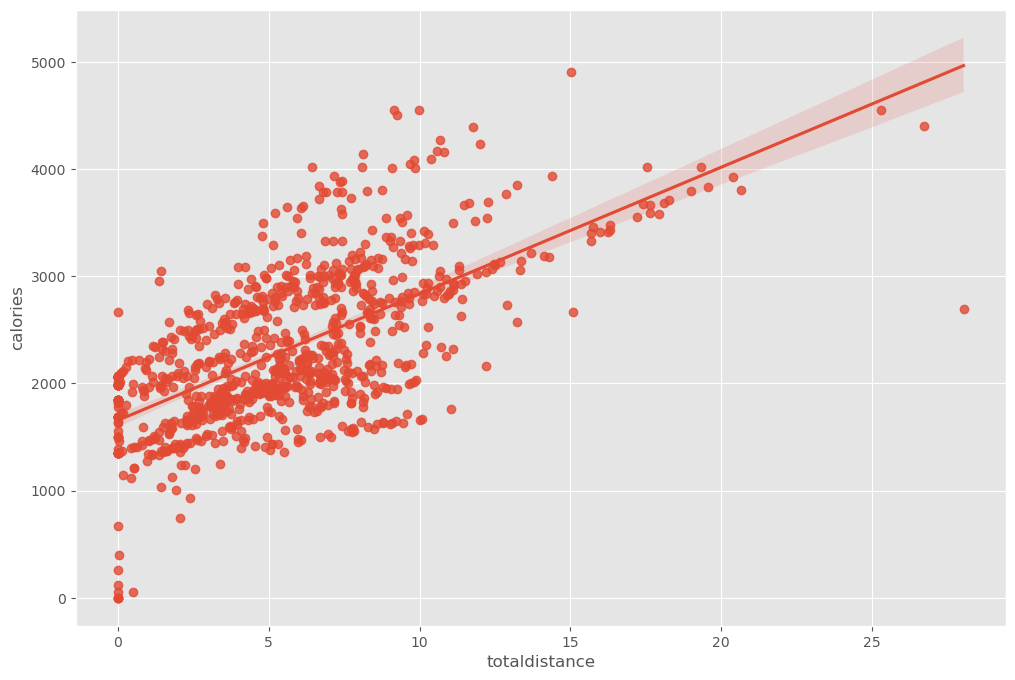

In [30]:
sns.regplot(x='totaldistance',y='calories',data=df)

<AxesSubplot:>

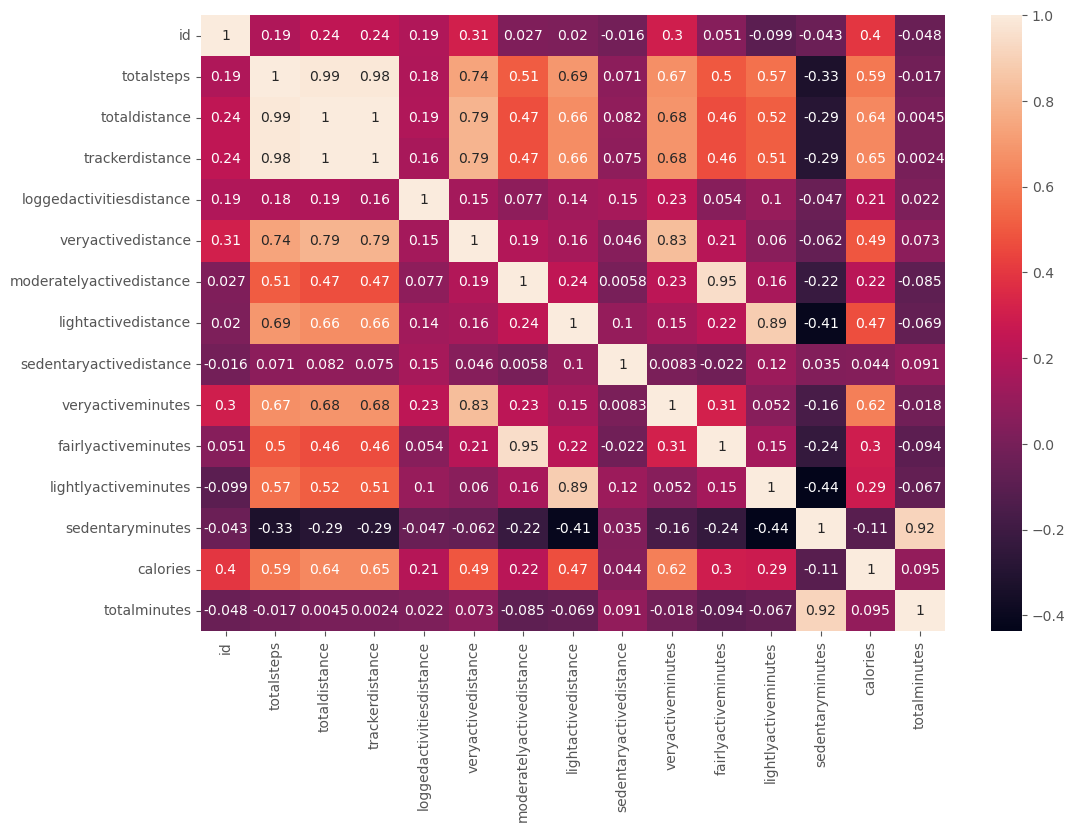

In [59]:
sns.heatmap(df.corr(),annot=True)

In [27]:
df_numerized = df


for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name]= df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes
        
df_numerized

,id,activitydate,totalsteps,totaldistance,trackerdistance,loggedactivitiesdistance,veryactivedistance,moderatelyactivedistance,lightactivedistance,sedentaryactivedistance,veryactiveminutes,fairlyactiveminutes,lightlyactiveminutes,sedentaryminutes,calories,totalminutes,day_of_week
0,1503960366,2016-04-12,13162,8.500000,8.500000,0.0,1.88,0.55,6.06,0.00,25,13,328,728,1985,1094,5
1,1503960366,2016-04-13,10735,6.970000,6.970000,0.0,1.57,0.69,4.71,0.00,21,19,217,776,1797,1033,6
2,1503960366,2016-04-14,10460,6.740000,6.740000,0.0,2.44,0.40,3.91,0.00,30,11,181,1218,1776,1440,4
3,1503960366,2016-04-15,9762,6.280000,6.280000,0.0,2.14,1.26,2.83,0.00,29,34,209,726,1745,998,0
4,1503960366,2016-04-16,12669,8.160000,8.160000,0.0,2.71,0.41,5.04,0.00,36,10,221,773,1863,1040,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
935,8877689391,2016-05-08,10686,8.110000,8.110000,0.0,1.08,0.20,6.80,0.00,17,4,245,1174,2847,1440,3
936,8877689391,2016-05-09,20226,18.250000,18.250000,0.0,11.10,0.80,6.24,0.05,73,19,217,1131,3710,1440,1
937,8877689391,2016-05-10,10733,8.150000,8.150000,0.0,1.35,0.46,6.28,0.00,18,11,224,1187,2832,1440,5
938,8877689391,2016-05-11,21420,19.559999,19.559999,0.0,13.22,0.41,5.89,0.00,88,12,213,1127,3832,1440,6


<AxesSubplot:>

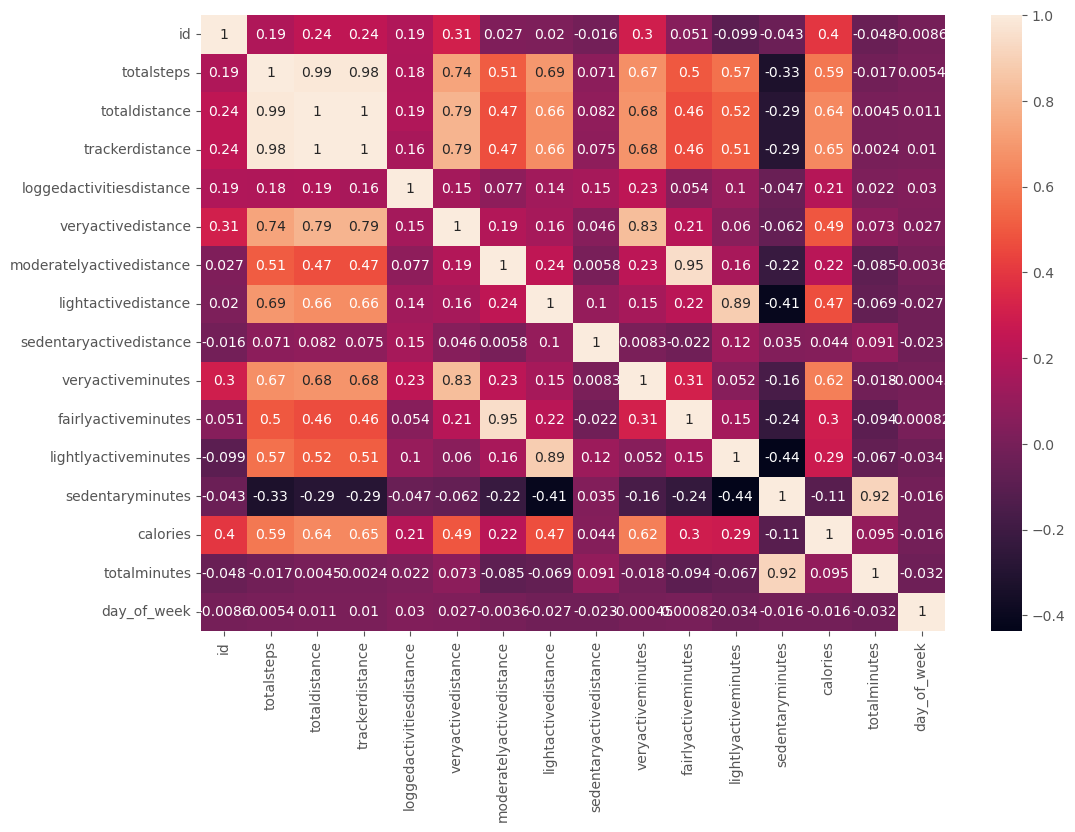

In [95]:
sns.heatmap(df_numerized.corr(),annot=True)

Text(0.5, 1.0, 'day_of_week vs totalsteps')

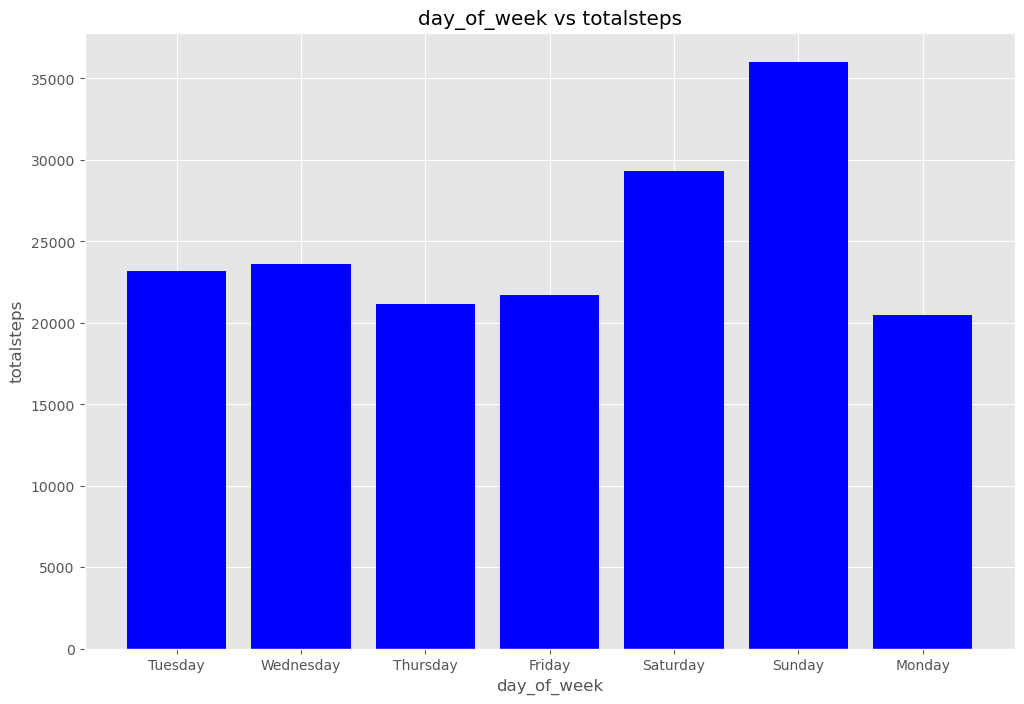

In [87]:
plt.bar(df.day_of_week,df.totalsteps,color='blue')
plt.xlabel('day_of_week')
plt.ylabel('totalsteps')
plt.title('day_of_week vs totalsteps')

(array([16904., 16908., 16912., 16916., 16920., 16922., 16926., 16930.,
        16934.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

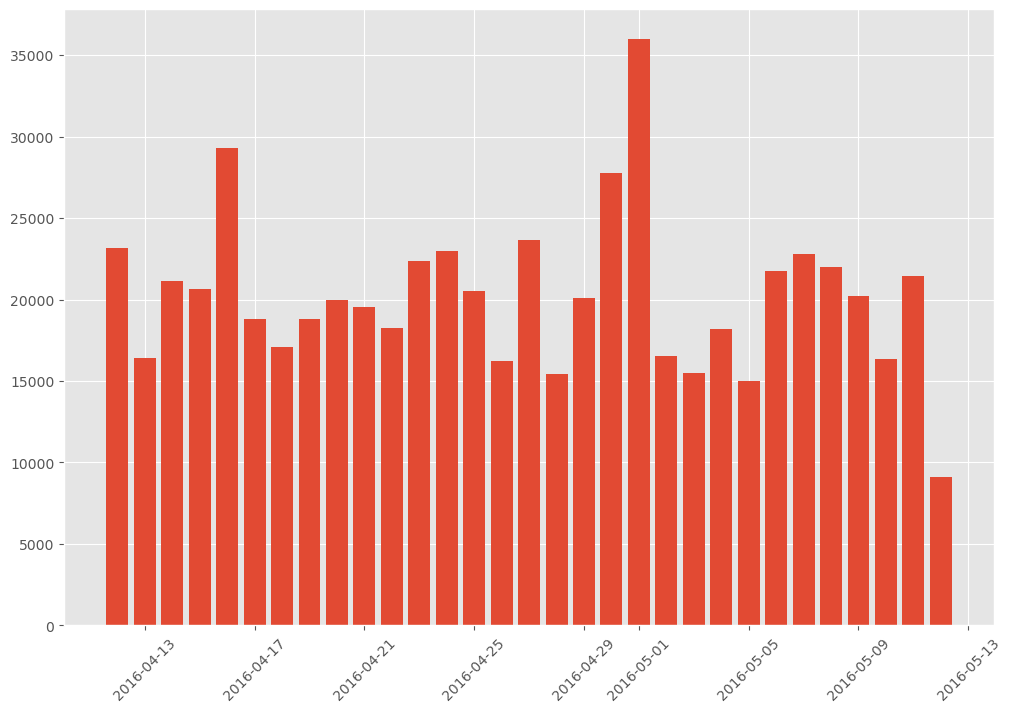

In [103]:
plt.bar(df.activitydate,df.totalsteps)
plt.xticks(rotation=45)
plt.show()

([<matplotlib.patches.Wedge at 0x2010008c190>,
 [Text(1.0983633515717721, 0.059982896929240755, 'veryactiveminutes'),
  Text(1.0886022147551395, 0.1579405522030527, 'fairlyactiveminutes'),
  Text(0.8580470838875357, 0.6882987736674362, 'lightlyactiveminutes'),
  Text(-0.9161475838727016, -0.6088297007901401, 'sedentaryminutes')],
 [Text(0.5991072826755119, 0.03271794377958586, '1.7%'),
  Text(0.5937830262300761, 0.086149392110756, '1.1%'),
  Text(0.4680256821204739, 0.3754356947276924, '15.8%'),
  Text(-0.4997168639305644, -0.33208892770371273, '81.3%')])

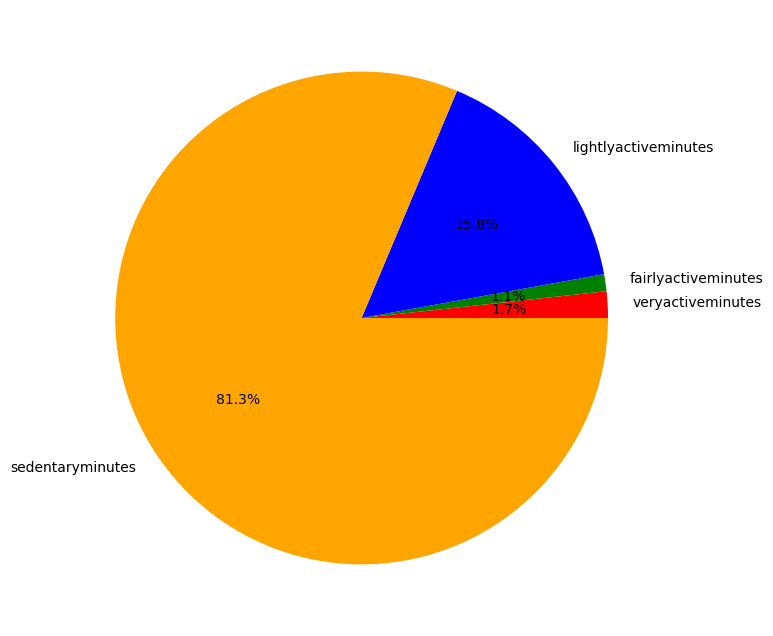

In [127]:
slices=[df['veryactiveminutes'].sum(),df['fairlyactiveminutes'].sum(),df['lightlyactiveminutes'].sum(),df['sedentaryminutes'].sum()]
activities=['veryactiveminutes','fairlyactiveminutes','lightlyactiveminutes','sedentaryminutes']
colors=['red','green','blue','orange']
plt.pie(slices,labels=activities,colors=colors,autopct='%1.1f%%')

([<matplotlib.patches.Wedge at 0x201003e6490>,
 [Text(1.0533687749619116, 0.31688203473097337, 'veryactiveminutes'),
  Text(0.7883862311655286, 0.7671030898833702, 'fairlyactiveminutes'),
  Text(-0.9759478303857436, -0.5074700310021864, 'lightlyactiveminutes')],
 [Text(0.5745647863428608, 0.17284474621689455, '9.3%'),
  Text(0.43002885336301555, 0.418419867209111, '6.0%'),
  Text(-0.5323351802104055, -0.2768018350921016, '84.7%')])

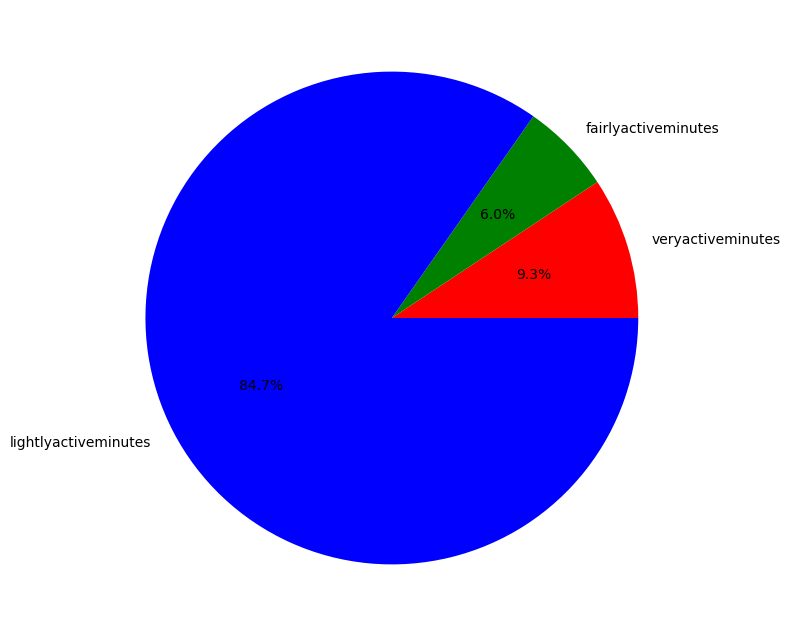

In [149]:
slices=[df['veryactiveminutes'].sum(),df['fairlyactiveminutes'].sum(),df['lightlyactiveminutes'].sum()]
activities=['veryactiveminutes','fairlyactiveminutes','lightlyactiveminutes']
colors=['red','green','blue']
plt.pie(slices,labels=activities,colors=colors,autopct='%1.1f%%')

<BarContainer object of 4 artists>

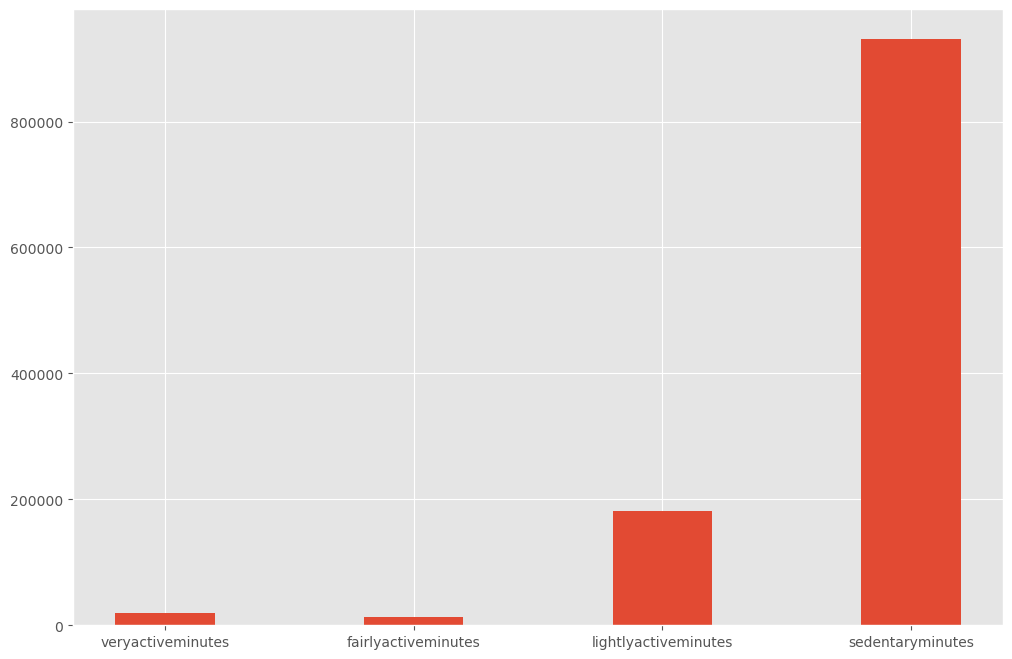

In [137]:
x=['veryactiveminutes','fairlyactiveminutes','lightlyactiveminutes','sedentaryminutes']
y=[df['veryactiveminutes'].sum(),df['fairlyactiveminutes'].sum(),df['lightlyactiveminutes'].sum(),df['sedentaryminutes'].sum()]
plt.bar(x,y,width=0.4)

<BarContainer object of 4 artists>

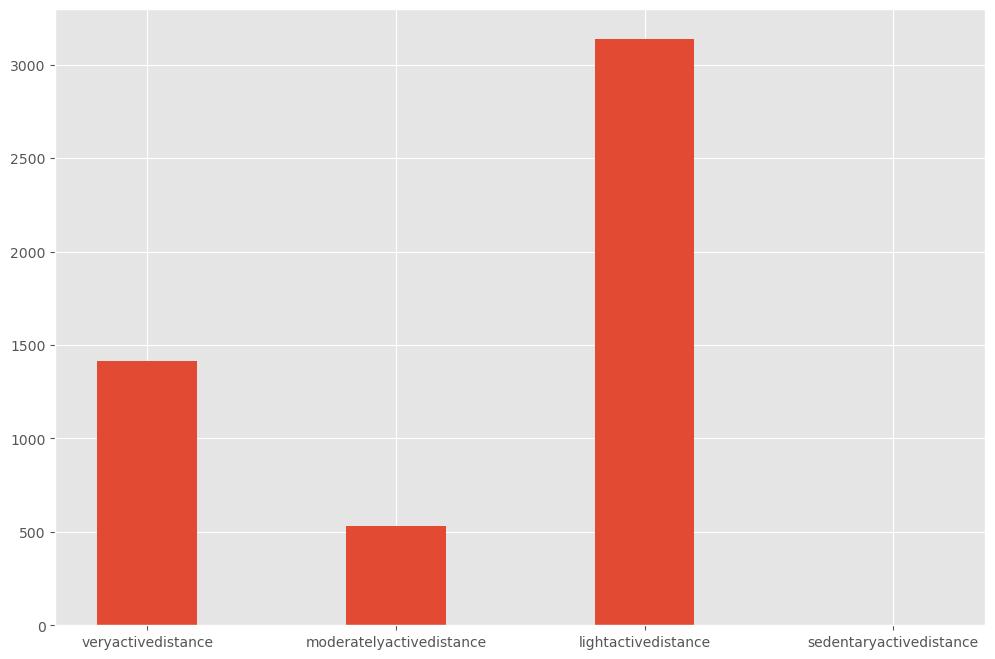

In [139]:
x=['veryactivedistance','moderatelyactivedistance','lightactivedistance','sedentaryactivedistance']
y=[df['veryactivedistance'].sum(),df['moderatelyactivedistance'].sum(),df['lightactivedistance'].sum(),df['sedentaryactivedistance'].sum()]
plt.bar(x,y,width=0.4)

Text(0.5, 1.0, 'day_of_week vs totaldistance')

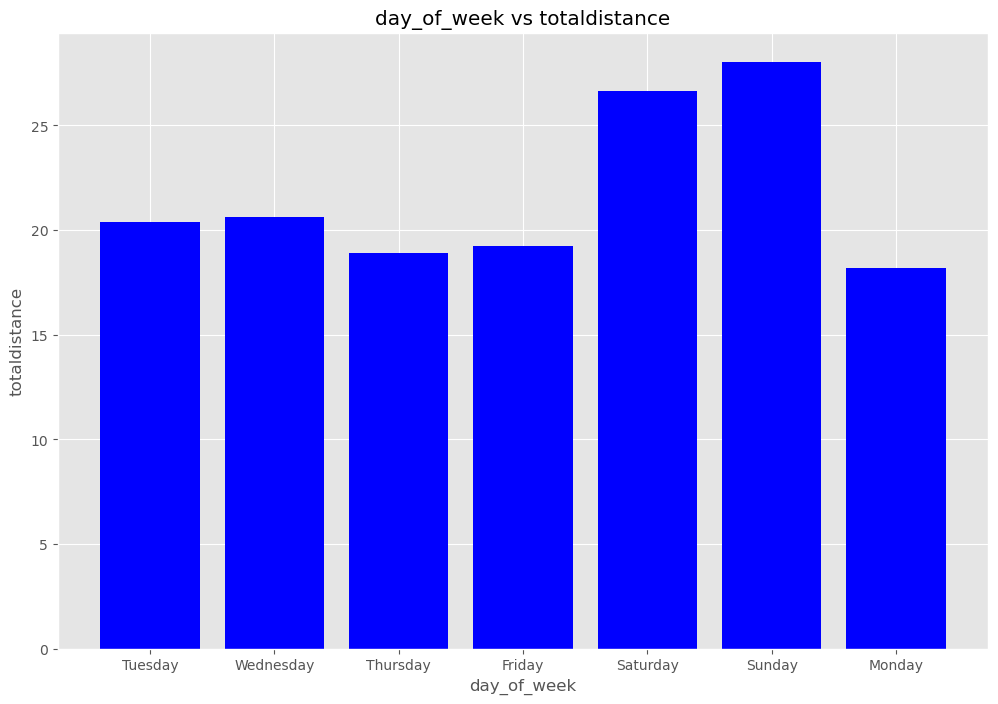

In [158]:
bar1=plt.bar(df.day_of_week,df.totaldistance,color='blue')
plt.xlabel('day_of_week')
plt.ylabel('totaldistance')
plt.title('day_of_week vs totaldistance')

Text(0.5, 1.0, 'day_of_week vs totalactiveminutes')

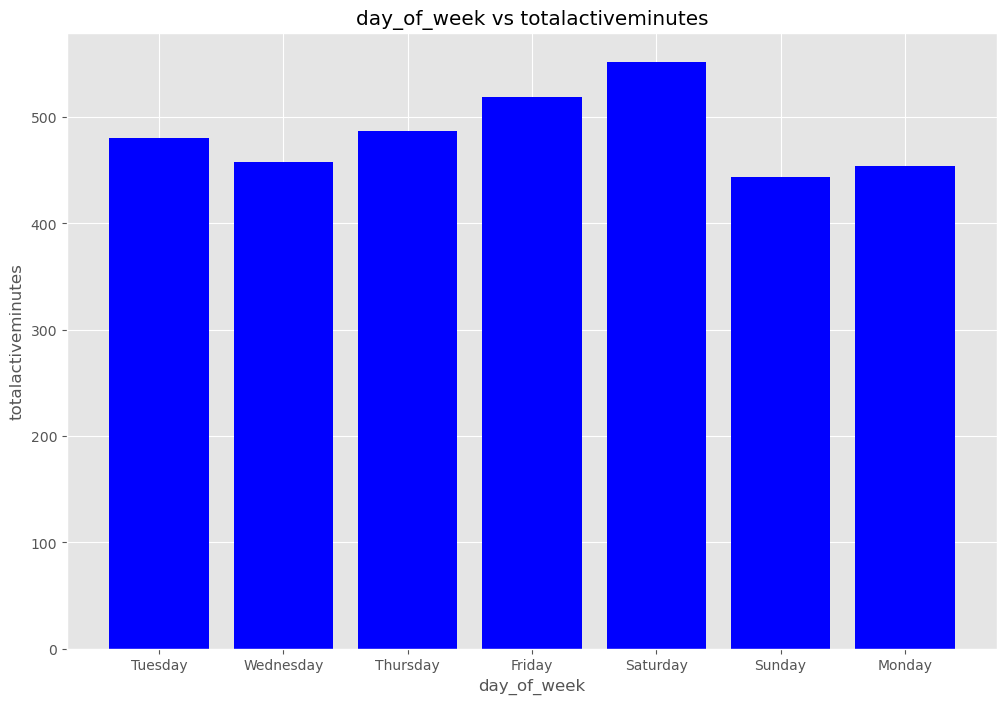

In [157]:
bar2=plt.bar(df.day_of_week,df.totalactiveminutes,color='blue')
plt.xlabel('day_of_week')
plt.ylabel('totalactiveminutes')
plt.title('day_of_week vs totalactiveminutes')

<AxesSubplot:xlabel='totaldistance', ylabel='totalactiveminutes'>

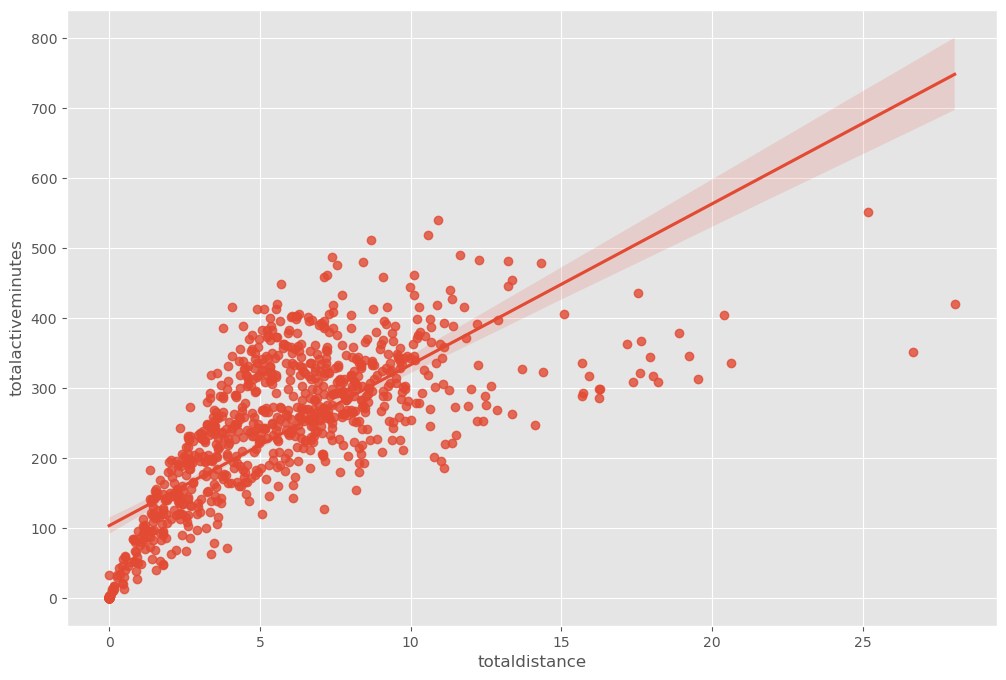

In [170]:
sns.regplot(x='totaldistance',y='totalactiveminutes',data=df)